# Статистический анализ данных. Домашняя работа.  Students Performance in Exams

## Пару слов о данных

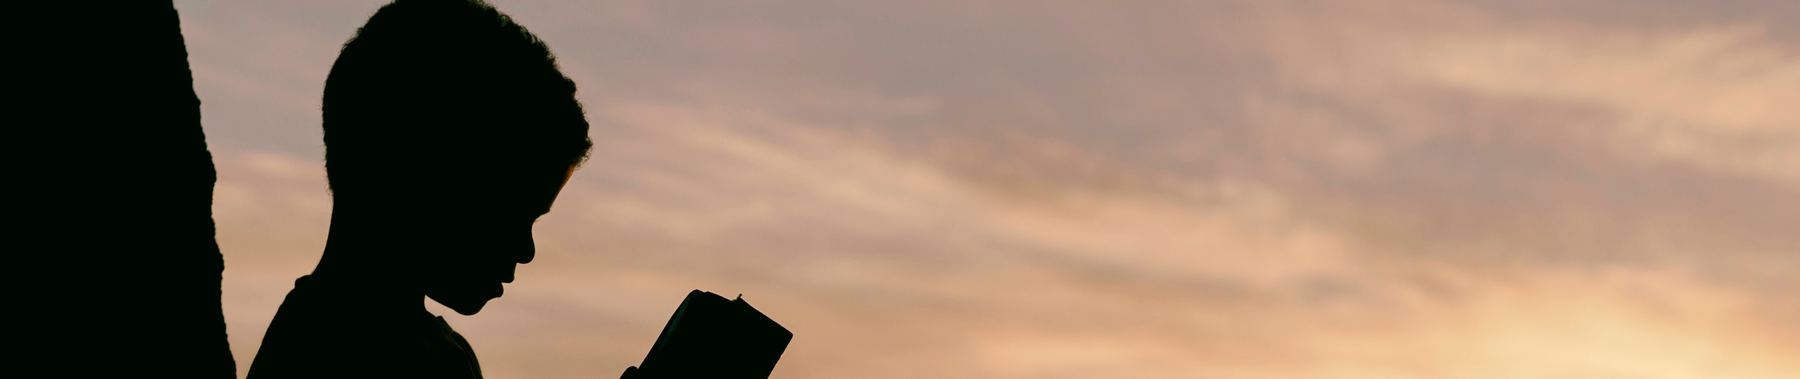

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Данные об оценках, полученных учащимися средней школы

Признаки:
- Gender: пол (мужской/женский)
- race/ethnicity: категориальный признак, 5 категорий
- parental level of education: категориальный признак, образование родителей
- lunch: категориальный признак (standard, free/reduced)
- test preparation course: категориальный признак (none, completed)
- math score: баллы по математике
- reading score: баллы по чтению
- writing score: баллы по письму

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')

## Загрузка данных, первый взгляд

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
861,female,group E,master's degree,free/reduced,none,81,86,87
175,female,group C,master's degree,standard,completed,81,91,87
881,female,group E,bachelor's degree,standard,completed,71,70,70
142,female,group E,some college,free/reduced,completed,42,55,54
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Ура, пропущенных данных нет

## Анализ признаков

Посмотрим на распределение малчиков/девочек

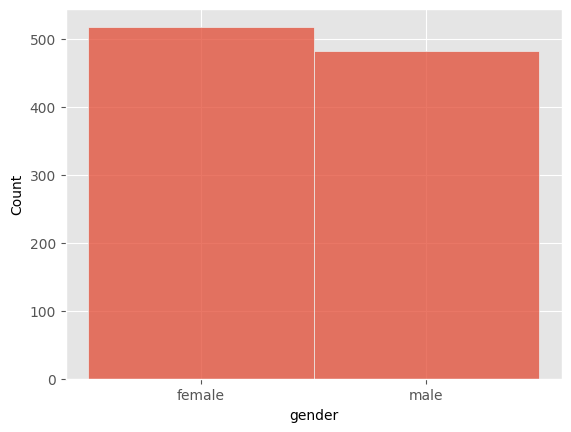

In [6]:
sns.histplot(data=df, x='gender');

Видим, что классы практически сбалансированны

Добавим новый признак - сумма всех баллов

In [7]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

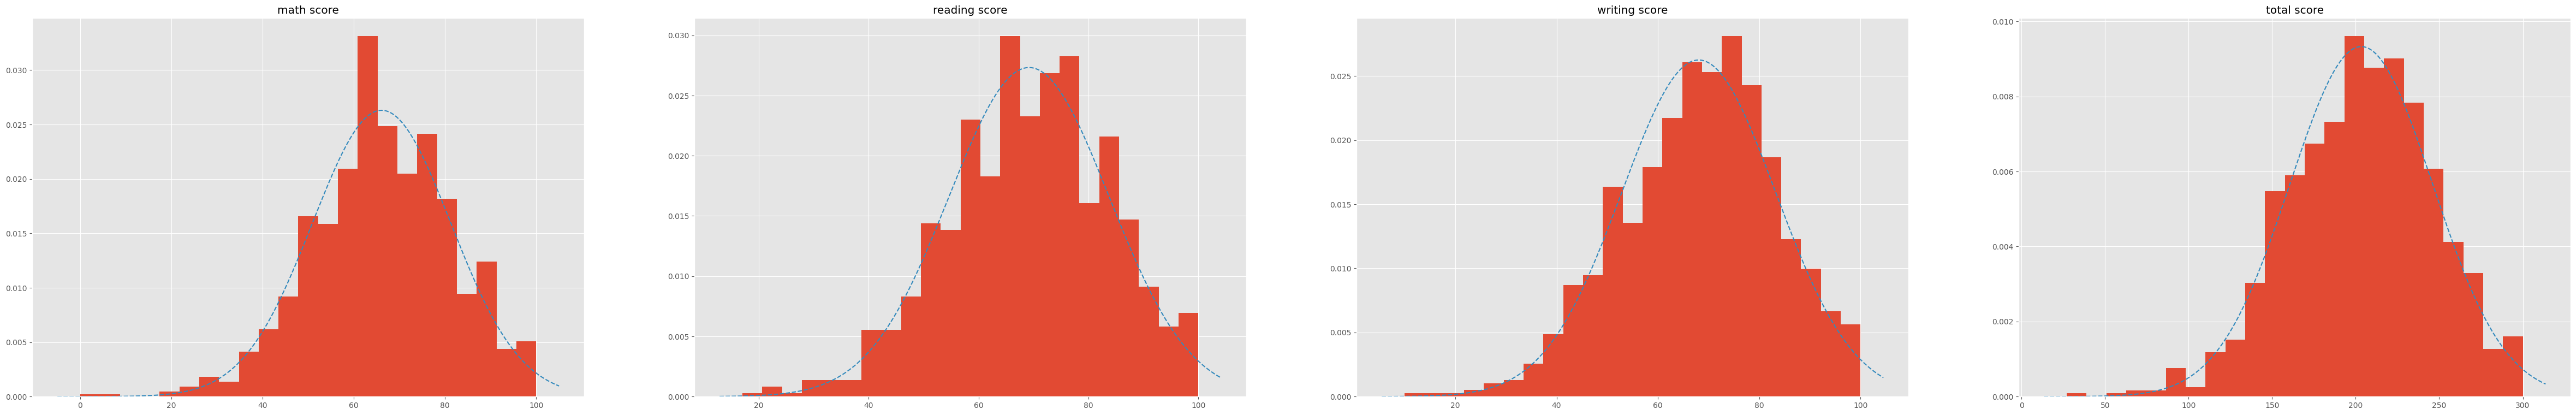

In [8]:
keys = ['math score', 'reading score', 'writing score', 'total score']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(15 * len(keys), 9)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Похоже на нормальное распределение, построим Q-Q кривые

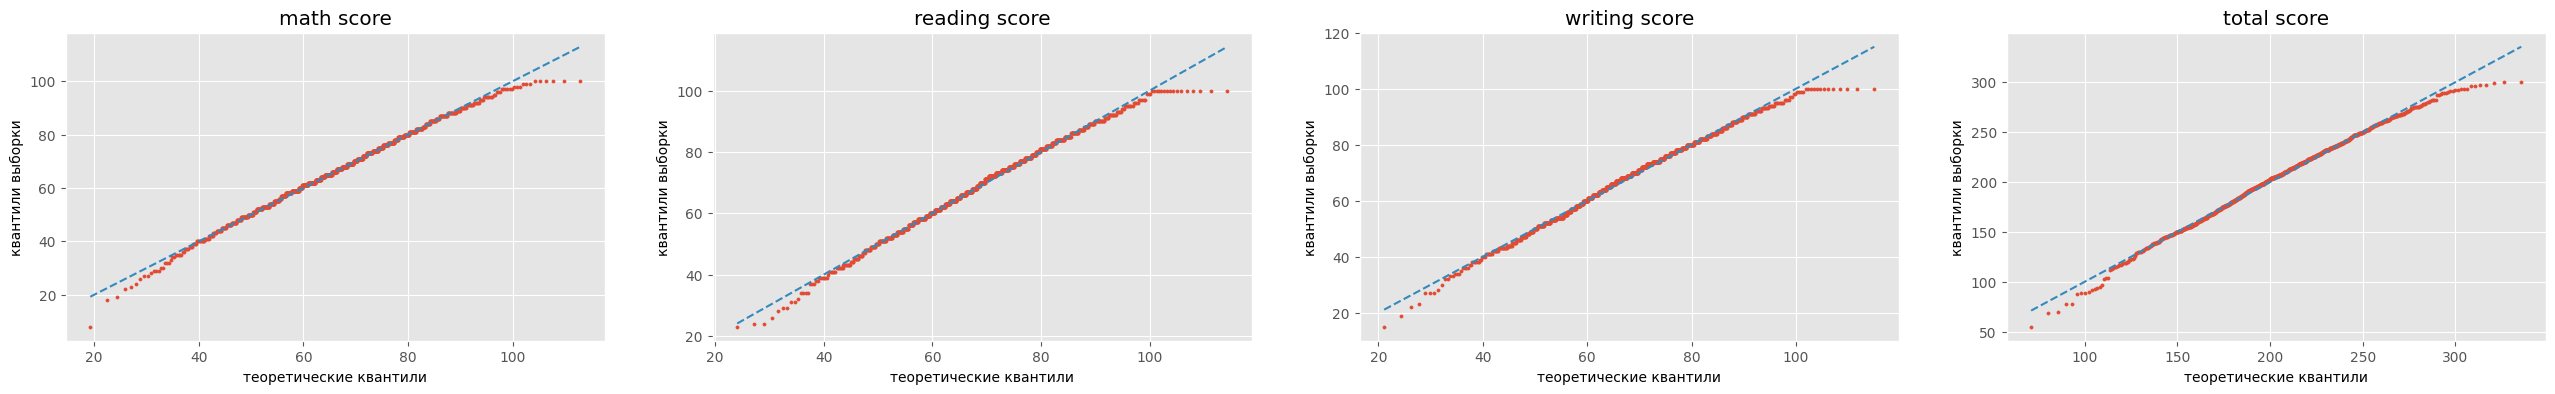

In [9]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

видим, что распределения баллов близки к нормальному (отклонения слева и справа обусловленны тем, что количество баллов находится в диапазоне от 0 до 100)

Посмотрим, насколько близки распределения выбранных признаков к нормальным

In [10]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

math score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.696
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.954
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.996

reading score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.664
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.954
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.996

writing score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.688
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.958
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.996

total score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.671
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.955
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.996



Получаем, что полученные показатели близки к нормальному распределению

Посмотрим, коррелируют ли баллы по предметам между собой

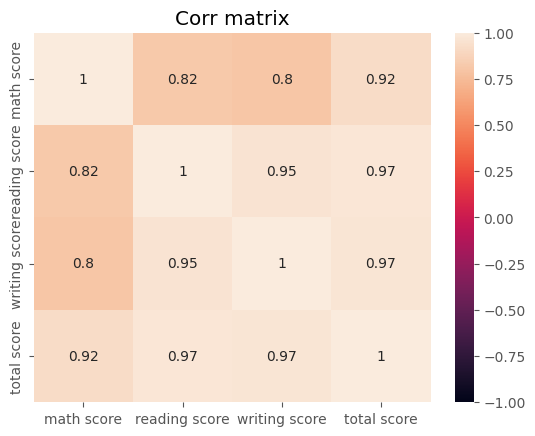

In [11]:
sns.heatmap(df[keys].corr(), annot=True, vmin=-1, vmax=1,)
plt.title("Corr matrix");

Как мы видим, баллы по чтению и письму имеют очень высокий коэффициент корреляции между собой и меньший (однако всё-еще высокий) с баллами по математике

### Анализ баллов зависимости от пола

Попробуем понять, зависят ли баллы по трем предметам от пола ученика

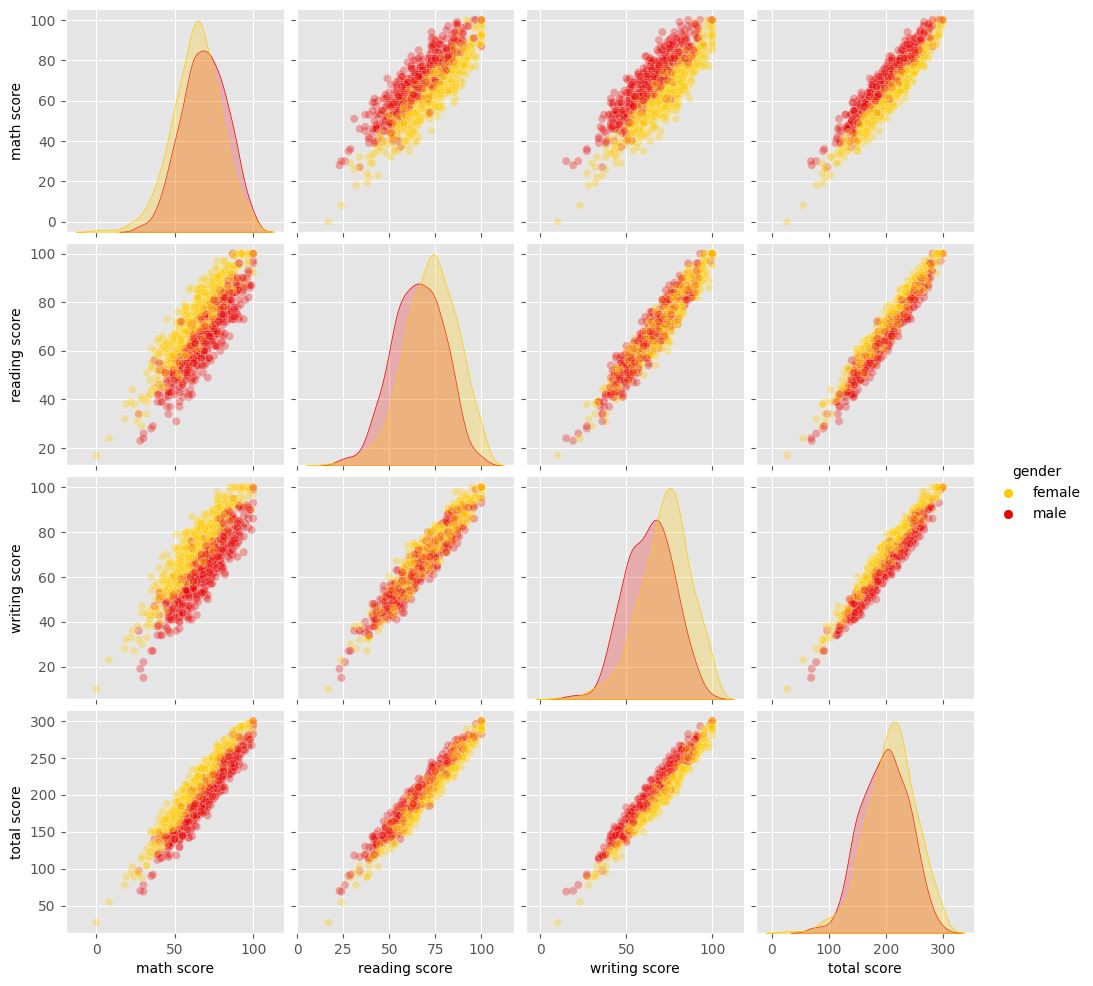

In [12]:
sns.pairplot(data=df, hue='gender', plot_kws={'alpha':0.3},palette='hot_r');

Видим интересный результат, на первый взгляд кажется, что мальчики лучше справились с экзаменом по математике, в то время как девочки имеют лучшие результаты по другим предметам и по всем экзаменам в целом

Проверим, взяты ли две выборки (баллы мальчиков и девочек) взяты из "одного" распределения вероятностей и выясним, есть ли между двумя этими выборками значимое различие

In [13]:
print(f"Male mean total score: {df[df.gender=='male']['total score'].mean()}")
print(f"Female mean total score {df[df.gender=='female']['total score'].mean()}")

Male mean total score: 197.5124481327801
Female mean total score 208.70849420849422


In [14]:
stats.ttest_ind(df[df.gender=='male']['total score'], df[df.gender=='female']['total score'])

Ttest_indResult(statistic=-4.169913529142, pvalue=3.311973638243664e-05)

In [15]:
print(f"Male mean total score: {df[df.gender=='male']['math score'].mean()}")
print(f"Female mean total score {df[df.gender=='female']['math score'].mean()}")

Male mean total score: 68.72821576763485
Female mean total score 63.633204633204635


In [16]:
stats.ttest_ind(df[df.gender=='male']['math score'], df[df.gender=='female']['math score'])

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)

Получаем, что по t-критерию разница в среднем значении баллов мальчиков по математике больше, чем девочек, а среднее общего количества баллов меньше, чем у девочек 

### Образование родителей

Проверим, как зависит общий балл от образования родителей

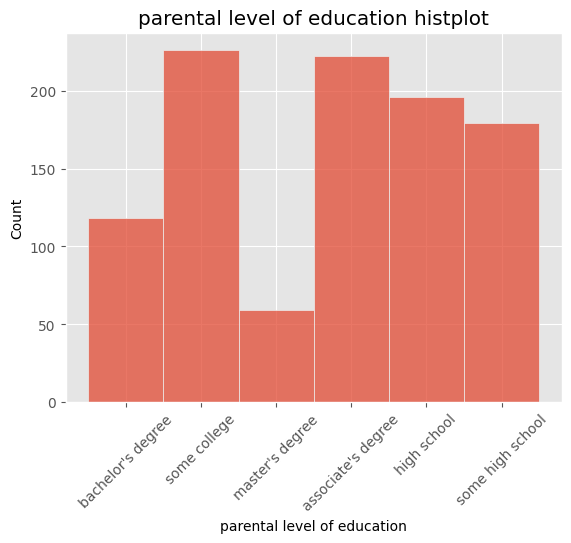

In [17]:
fig = sns.histplot(data=df, x="parental level of education")
plt.title("parental level of education histplot")
plt.xticks(rotation=45);

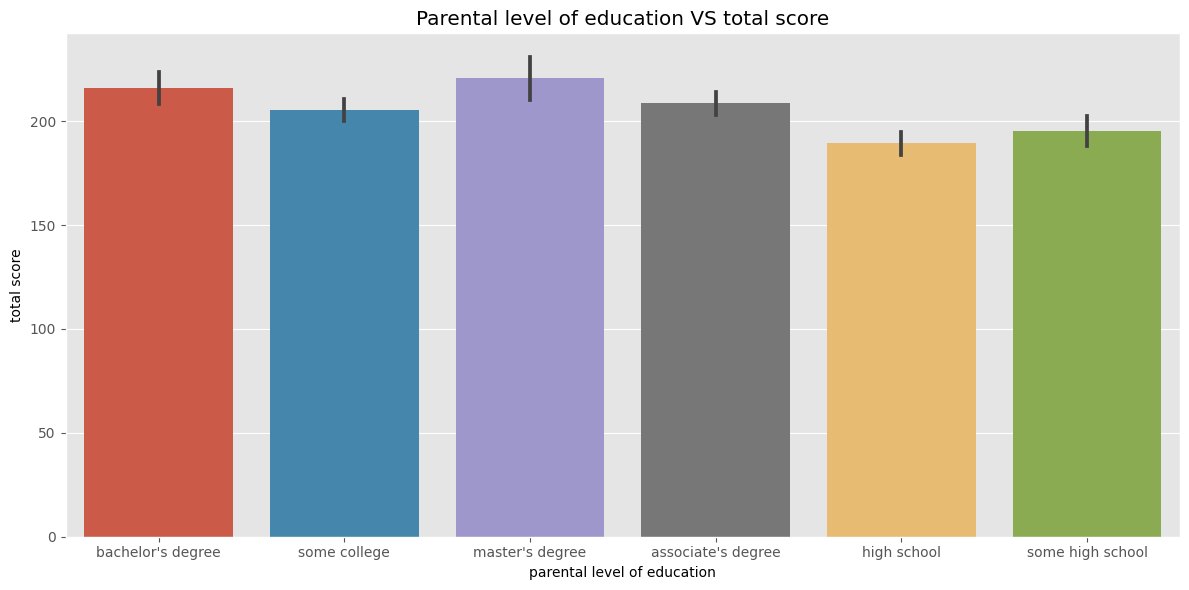

In [18]:
plt.figure(figsize=(12, 6))
plt.title('Parental level of education VS total score')
sns.barplot(x=df['parental level of education'],y='total score',data=df)
plt.tight_layout();

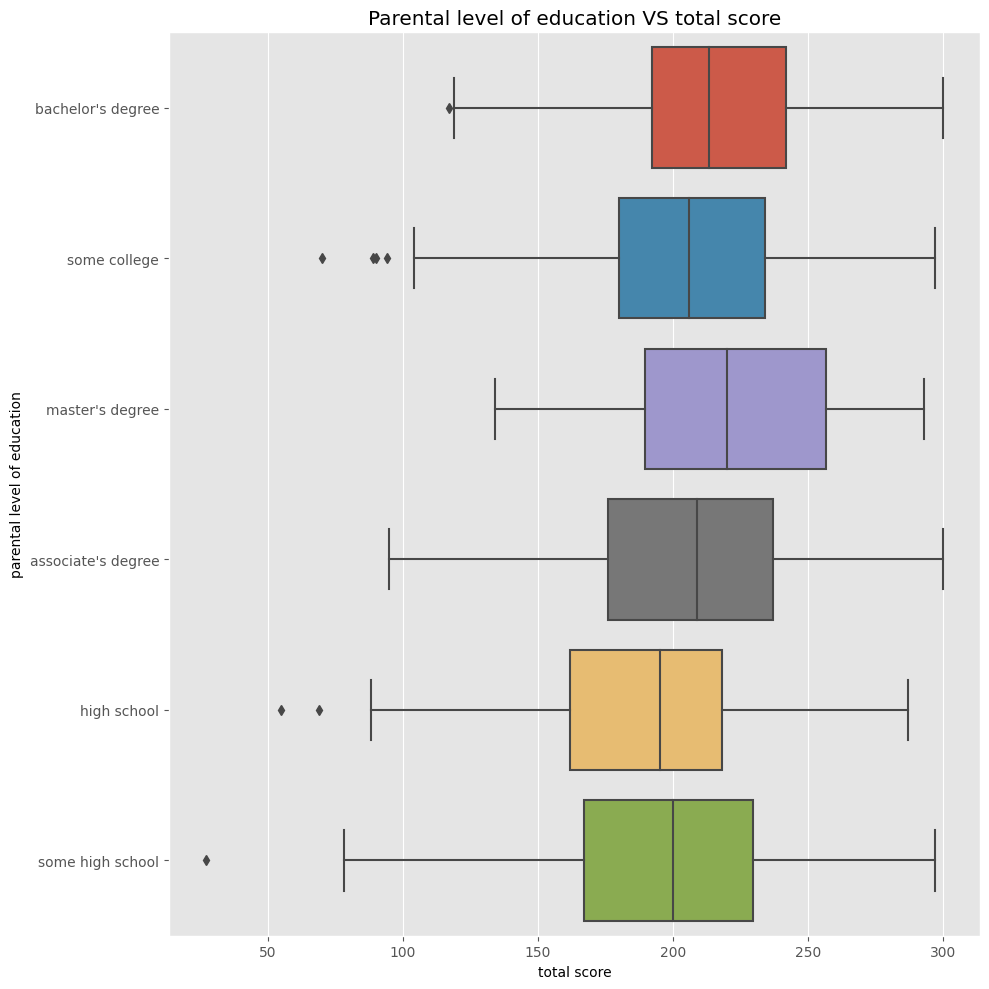

In [19]:
plt.figure(figsize=(10, 10))
plt.title("Parental level of education VS total score")
sns.boxplot(data=df, x='total score', y='parental level of education');
plt.tight_layout();

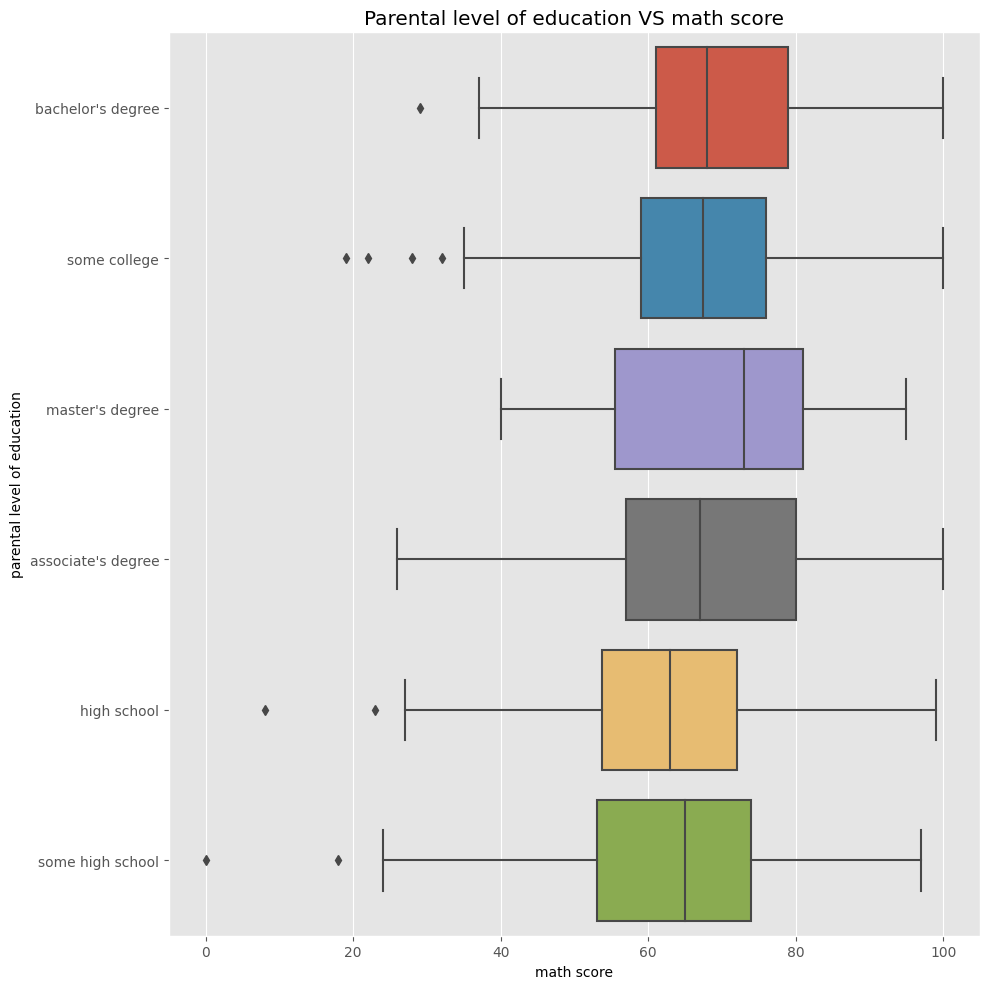

In [20]:
plt.figure(figsize=(10, 10))
plt.title("Parental level of education VS math score")
sns.boxplot(data=df, x='math score', y='parental level of education');
plt.tight_layout();

Посмотрим на распределение общего балла среди детей магистров и родителей со средним образованием и избавимся от этого громоздкого названия колонки :)

In [21]:
df.rename(columns={'parental level of education': 'edu'}, inplace=True)

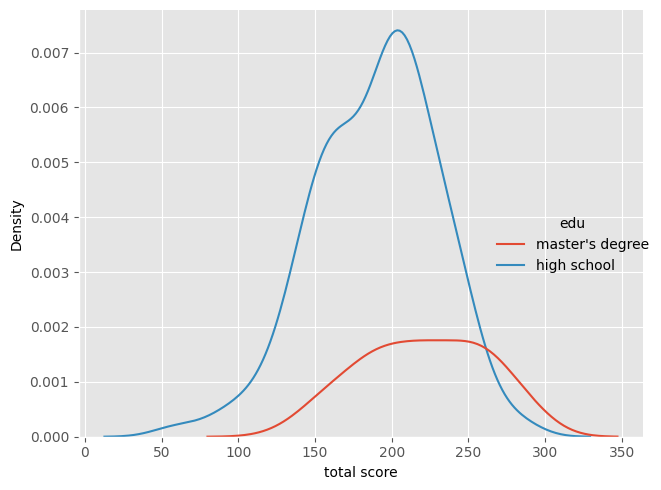

In [22]:
df1 = df[(df.edu == "master's degree") |(df.edu == "high school")].copy()
sns.displot(data=df1, x='total score', hue='edu', kind='kde')
plt.tight_layout();

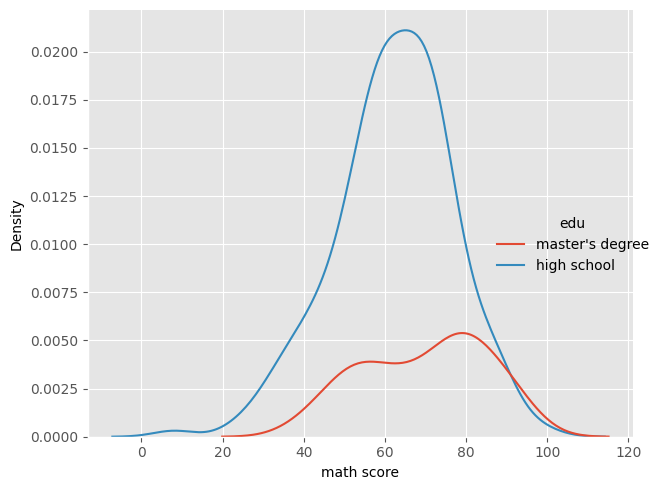

In [23]:
df1 = df[(df.edu == "master's degree") |(df.edu == "high school")].copy()
sns.displot(data=df1, x='math score', hue='edu', kind='kde')
plt.tight_layout();

In [24]:
print("master's degree mean total score", df[df.edu=="master's degree"]['total score'].mean())
print("high school degree mean total score", df[df.edu=="high school"]['total score'].mean())

master's degree mean total score 220.79661016949152
high school degree mean total score 189.2908163265306


In [25]:
print("master's degree mean math score", df[df.edu=="master's degree"]['math score'].mean())
print("high school degree mean math score", df[df.edu=="high school"]['math score'].mean())

master's degree mean math score 69.7457627118644
high school degree mean math score 62.13775510204081


In [26]:
stats.ttest_ind(df[df.edu=="master's degree"]['total score'], df[df.edu=='high school']['total score'])

Ttest_indResult(statistic=5.226505457467738, pvalue=3.615968596010567e-07)

In [27]:
stats.ttest_ind(df[df.edu=="master's degree"]['math score'], df[df.edu=='high school']['math score'])

Ttest_indResult(statistic=3.4893759321890823, pvalue=0.000570929230228812)

Полученные результаты говорят о том, что мы можем считать средний балл детей родителей магистров больше, чем детей, родители которых окончили только среднее образование

### Подготовительные курсы

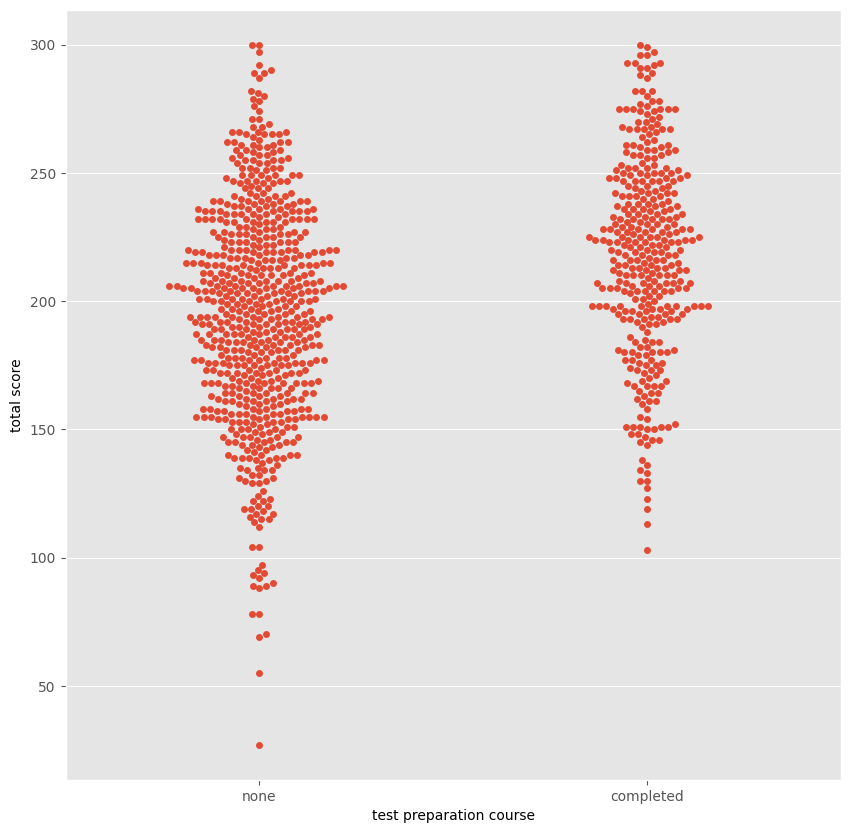

In [28]:
plt.figure(figsize=(10, 10))
sns.swarmplot(x=df['test preparation course'], y=df['total score']);

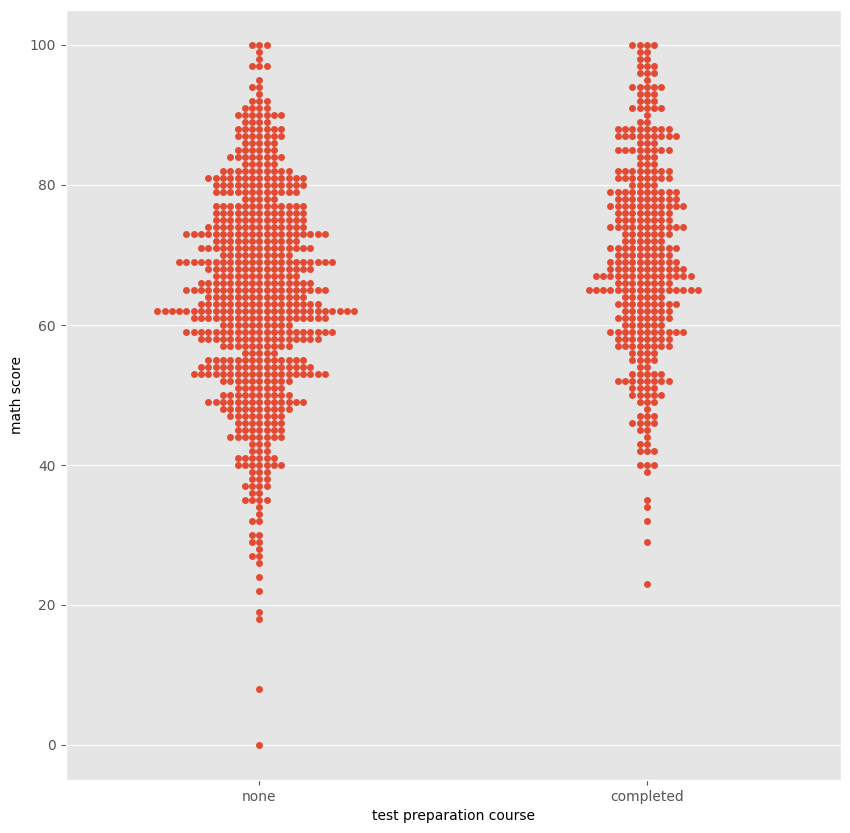

In [29]:
plt.figure(figsize=(10, 10))
sns.swarmplot(x=df['test preparation course'], y=df['math score']);

Как видно, прохождение курсов повышает как общий балл, так и балл по математике

### Обед по расписанию

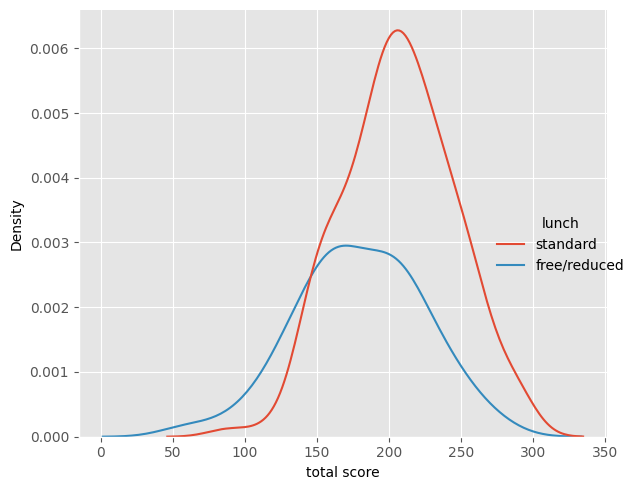

In [30]:
sns.displot(data=df1, x='total score', hue='lunch', kind='kde')
plt.tight_layout();

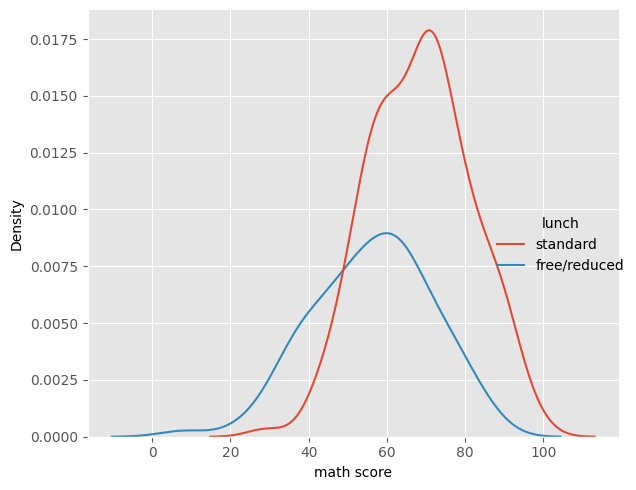

In [31]:
sns.displot(data=df1, x='math score', hue='lunch', kind='kde')
plt.tight_layout();

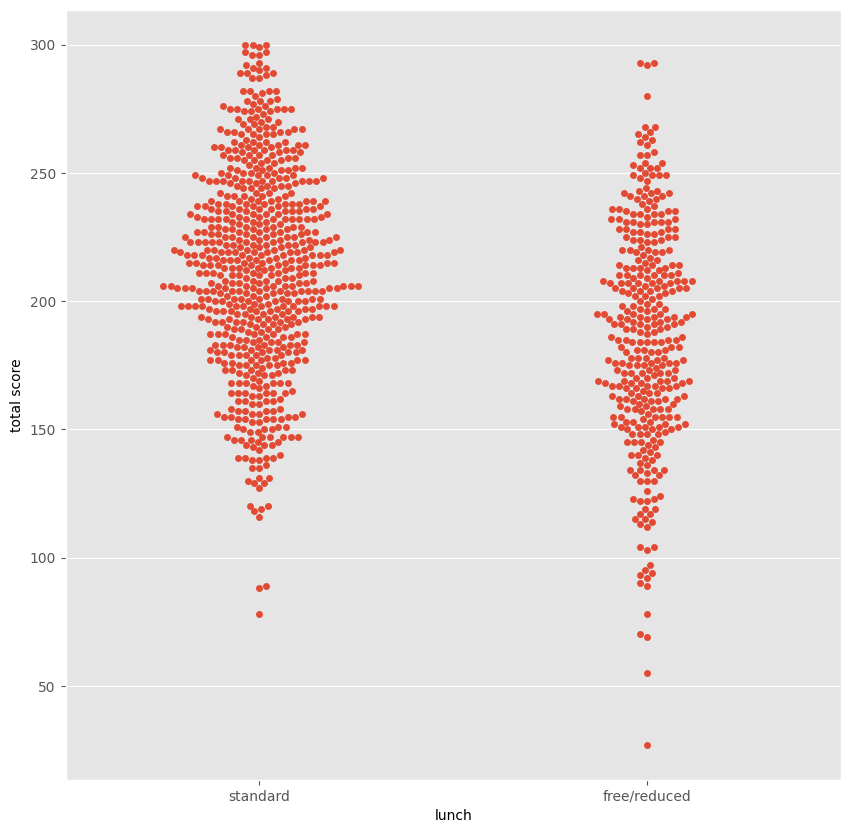

In [32]:
plt.figure(figsize=(10, 10))
sns.swarmplot(x=df['lunch'], y=df['total score']);

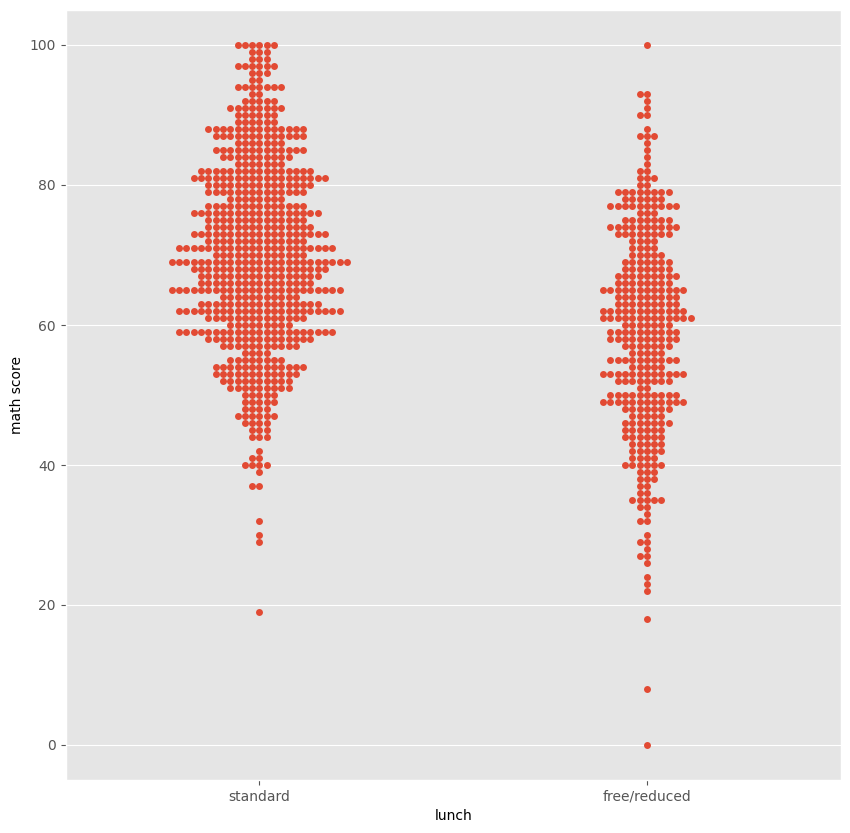

In [33]:
plt.figure(figsize=(10, 10))
sns.swarmplot(x=df['lunch'], y=df['math score']);

Как мы видим, общий балл и баллы по математике связаны (вероятно, эти признаки взаимосвязаны, т.к. бесплатное питание получают дети из бедных и неблагополучных семей)

## Выводы

- Баллы школьников из средней школы по всем предметам распределены нормально

- Девочки получают в среднем больше баллов в сумме, однако мальчики в среднем показывают лучше результаты в математике

- Дети родителей с более "высоким" образованием получают в среднем больше баллов (по результату сравнения детей родителей со степенью магистра и детей родителей со средним образованием) 

- Резульаты тестов зависят от того, проходил ли школьник подготовительные курсы

- Также результаты зависят от типа питания, которое в свою очередь скорее всего связано с материальным положением семьи